# Graph Embeddings

Due to their nature, graphs can be analyzed at different levels of granularity: at the node, edge, and graph level (the whole graph), as depicted in the following figure. For each of those levels, different problems could be faced and, as a consequence, specific algorithms should be used.

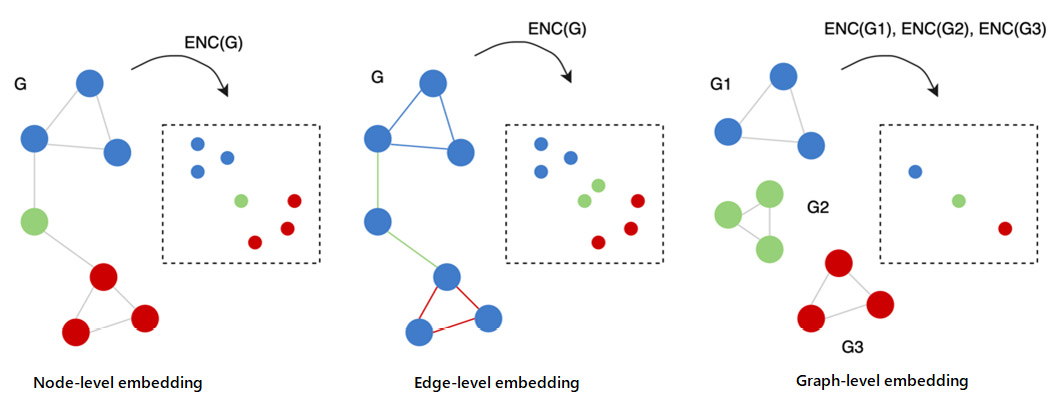

The first, and most straightforward, way of creating features capable of representing structural information from graphs is the extraction of certain statistics. For instance, a graph could be represented by its degree distribution, efficiency, and other metrics.

A more complex procedure consists of applying specific kernel functions or, in other cases, engineering-specific features that are capable of incorporating the desired properties into the final machine learning model. However, as you can imagine, this process could be really time-consuming and, in certain cases, the features used in the model could represent just a subset of the information that is really needed to get the best performance for the final model.

In the last decade, a lot of work has been done in order to define new approaches for creating meaningful and compact representations of graphs. The general idea behind all these approaches is to create algorithms capable of *learning* a good representation of the original dataset such that geometric relationships in the new space reflect the structure of the original graph. We usually call the process of learning a good representation of a given graph **representation learning** or **network embedding.**

In [ ]:
!pip install node2vec
!pip install karateclub
!pip install python-Levenshtein
!pip install gensim==3.8.0

In [ ]:
import random
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
from karateclub import Graph2Vec
from node2vec.edges import HadamardEmbedder

In [ ]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Graph2Vec Example

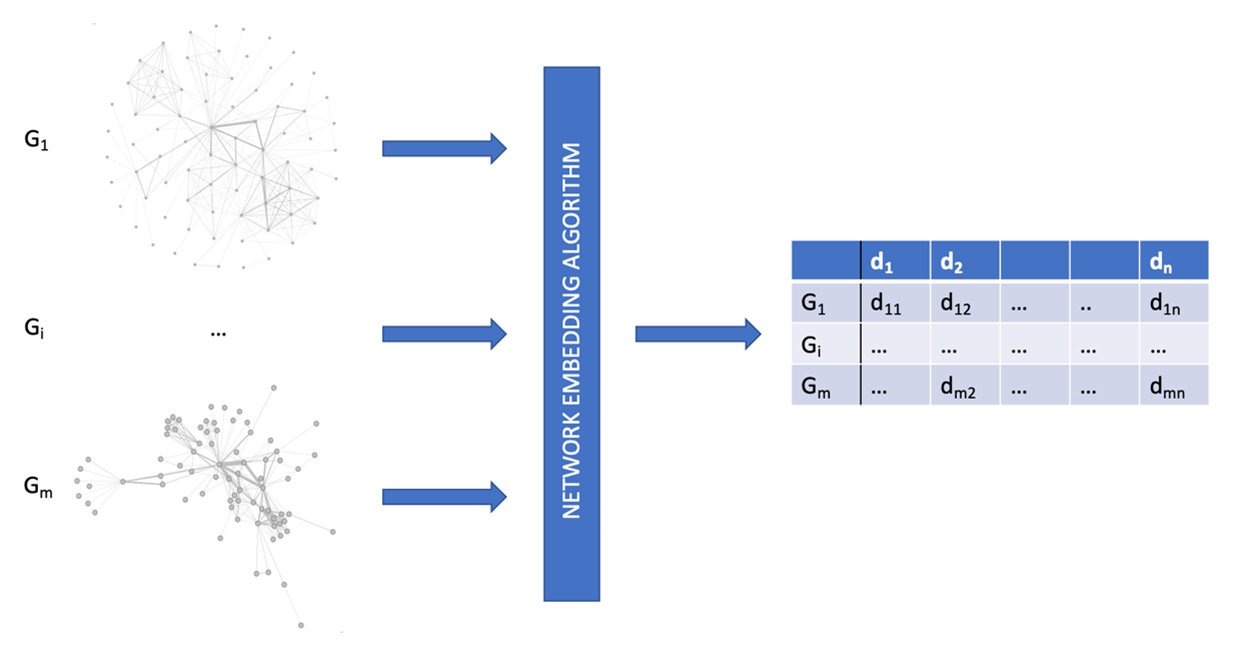

Given a dataset with *m* different graphs, the task is to build a machine learning algorithm capable of classifying a graph into the right class. We can then see this problem as a classification problem, where the dataset is defined by a list of pairs, $<G_i,y_i>$, where $G_i$ is a graph and $y_i$ is the class the graph belongs to.

Representation learning (network embedding) is the task that aims to learn a mapping function $f:G \to \mathbb{R}^n$, from a discrete graph to a continuous domain. Function $f$ will be capable of performing a low-dimensional vector representation such that the properties (local and global) of graph $G$ are preserved.

In [ ]:
n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)

## Node2Vec example

Given a (possibly large) graph $G = (V,E)$, the goal is to classify each vertex $v \in V$ into the right class. In this setting, the dataset includes $G$ and a list of pairs, $<v_i,y_i>$, where $v_i$ is a node of graph $G$ and $y_i$ is the class to which the node belongs. In this case, the mapping function would be $f:V \to \mathbb{R}^n$.

In [ ]:
G = nx.barbell_graph(m1=7, m2=4)
draw_graph(G, nx.spring_layout(G))

In [ ]:
node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    v = model.wv.get_vector(str(x))
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## Edge2Vec example

Given a (possibly large) graph $G = (V,E)$, the goal is to classify each edge $e \in E$, into the right class. In this setting, the dataset includes $G$ and a list of pairs, $<e_i,y_i>$, where $e_i$ is an edge of graph $G$ and $y_i$ is the class to which the edge belongs. Another typical task for this level of granularity is **link prediction**, the problem of predicting the existence of a link between two existing nodes in a graph. In this case, the mapping function would be $f:E \to \mathbb{R}^n$.

In [ ]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)